# Predicting High-Risk Accident Zones across the USA
Team 12: Mishil Trivedi, Jeonghee (Christina) Son

https://colab.research.google.com/drive/1mtjRj2ADR90Q3ehmegoBfDdStf9NXFgv#scrollTo=8DbPMHEKNKVc

## 1.Introduction

### 1.1 Problem Statement

The increasing rate of car accidents in the United States poses a critical threat to public safety, leading to a tragic loss of lives, countless injuries, and substantial economic costs. Despite various safety initiatives, the persistence of traffic accidents underscores the need for a deeper understanding of the factors that influence their severity. This analysis focuses on predicting accident severity and examining the role of high-risk zones and key patterns, such as weather conditions and time of day, in shaping these outcomes. By uncovering these critical insights, the findings aim to support the development of more effective policies, optimize resource allocation, and drive meaningful progress in reducing accident severity and improving traffic safety across the nation.



### 1.2 Motivation

Car accidents aren’t just numbers—they’re lives lost, families changed forever, and communities left to deal with the aftermath. The steady rise in traffic accidents across the United States highlights the significant challenges we continue to face in keeping our roads safe. While current safety measures have made an impact, there remains a pressing need to better understand the factors driving these incidents. By analyzing elements like weather, time of day, and high-risk areas—and using this information to predict the severity of accidents—we can shift from reactive strategies to proactive steps that save lives. Leveraging data to uncover these patterns has the potential to transform accident prevention, enhance emergency responses, and create roads that are not only functional but genuinely safe for everyone.

### 1.3 Data Source

[US Accidents (2016 - 2023)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)

- This dataset encompasses countrywide car accident data spanning 49 states in the USA, collected from February 2016 to March 2023. The data was gathered through multiple APIs that provide streaming traffic incident information, sourced from various entities such as U.S. and state departments of transportation, law enforcement agencies, traffic cameras, and road network traffic sensors.

### 1.4 Data Description

The original dataset comprises 46 columns and approximately 7.7 million rows. Due to its large size, we will use a sampled version containing **46** columns and **500,000** rows, obtained through stratified sampling. Descriptions for each column are provided below.

| Attribute | Description | Nullable | Data Type|
| ----------| ---------|-------|-------|
|ID|This is a unique identifier of the accident record.|No|object|
|Source|This is the source of the traffic accident data.|No|object|
|Severity|Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).|No|object|
|Start_Time|Shows start time of the accident in local time zone.|No|int64|
|End_Time|Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.|No|object|
|Start_Lat|Shows latitude in GPS coordinate of the start point.|No|object|
|Start_Lng|Shows longitude in GPS coordinate of the start point.|No|float64|
|End_Lat|	Shows latitude in GPS coordinate of the end point.|Yes|float64|
|End_Lng|Shows longitude in GPS coordinate of the end point.|Yes|float64|
|Distance(mi)|The length of the road extent affected by the accident.|No|float64|
|Description|Shows natural language description of the accident.|No|object|
|Street|Shows the street name in address field.|Yes|object|
|City|Shows the city in address field.|Yes|object|
|County|Shows the county in address field.|Yes|object|
|State|Shows the state in address field.|Yes|object|
|Zipcode|Shows the zipcode in address field.|Yes|object|
|Country|Shows the country in address field.|Yes|object|
|Timezone|Shows timezone based on the location of the accident (eastern, central, etc.).|Yes|object|
|Airport_Code|Denotes an airport-based weather station which is the closest one to location of the accident.|Yes|object|
|Weather_Timestamp|Shows the time-stamp of weather observation record (in local time).|Yes|object|
|Temperature(F)|Shows the temperature (in Fahrenheit).|Yes|float64|
|Wind_Chill(F)|Shows the wind chill (in Fahrenheit).|Yes|float64|
|Humidity(%)|Shows the humidity (in percentage).|Yes|float64|
|Pressure(in)|Shows the air pressure (in inches).|Yes|float64|
|Visibility(mi)|Shows visibility (in miles).|Yes|float64|
|Wind_Direction|Shows wind direction.|Yes|object|
|Wind_Speed(mph)|Shows wind speed (in miles per hour).|Yes|float64|
|Percipitation(in)|Shows precipitation amount in inches, if there is any.|Yes|float64|
|Weather_Condition|Shows the weather condition (rain, snow, thunderstorm, fog, etc.)|Yes|object|
|Amenity|A POI annotation which indicates presence of amenity in a nearby location.|No|bool|
|Bump|A POI annotation which indicates presence of speed bump or hump in a nearby location.|No|bool|
|Crossing|A POI annotation which indicates presence of crossing in a nearby location.|No|bool|
|Give_Way|A POI annotation which indicates presence of give_way in a nearby location.|No|bool|
|Junction|A POI annotation which indicates presence of junction in a nearby location.|No|bool|
|No_Exit|A POI annotation which indicates presence of no_exit in a nearby location.|No|bool|
|Railway|A POI annotation which indicates presence of railway in a nearby location.|No|bool|
|Roundabout|A POI annotation which indicates presence of roundabout in a nearby location.|No|bool|
|Station|A POI annotation which indicates presence of station in a nearby location.|No|bool|
|Stop|A POI annotation which indicates presence of stop in a nearby location.|No|bool|
|Traffic_Calming|A POI annotation which indicates presence of traffic_calming in a nearby location.|No|bool|
|Traffic_Signal|A POI annotation which indicates presence of traffic_signal in a nearby loction.|No|bool|
|Turning_Loop|	A POI annotation which indicates presence of turning_loop in a nearby location.|No|bool|
|Sunrise_Sunset|	Shows the period of day (i.e. day or night) based on sunrise/sunset.|Yes|object|
|Civil_Twilight|Shows the period of day (i.e. day or night) based on civil twilight.|Yes|object|
|Nautical_Twilight|Shows the period of day (i.e. day or night) based on nautical twilight.|Yes|object|
|Astronomical_Twilight|Shows the period of day (i.e. day or night) based on astronomical twilight.|Yes|object|

## **2. Data Analysis**

### 2.1 Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 2.2 Data Import

In [ ]:
pip install gdown

In [ ]:
import gdown

# Google Drive file ID
file_id = '1XJtj8n-jXnB-Gek4Y4Q5VzXAvUkoxrxZ'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file using gdown
output_path = 'US_Accidents_March23.csv'
gdown.download(url, output_path, quiet=False)

# Load the CSV data into a pandas DataFrame
us_data = pd.read_csv(output_path)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1XJtj8n-jXnB-Gek4Y4Q5VzXAvUkoxrxZ
From (redirected): https://drive.google.com/uc?export=download&id=1XJtj8n-jXnB-Gek4Y4Q5VzXAvUkoxrxZ&confirm=t&uuid=c1808f52-57ba-4dec-b409-9749ade9b5de
To: /content/US_Accidents_March23.csv
100%|██████████| 3.06G/3.06G [00:54<00:00, 55.9MB/s]


In [ ]:
us_data.shape

NameError: name 'us_data' is not defined

### 2.3 Data Sampling

In [ ]:
# Define the sample size
sample_size = 15_000

# Perform the stratified split
us_accidents, test_data = train_test_split(
    us_data,
    train_size=sample_size,
    stratify=us_data['Severity'],
    random_state=42
)

### 2.4 Data Basic Information

In [ ]:
us_accidents.head(3)

In [ ]:
us_accidents.info()

In [ ]:
us_accidents.isnull().sum()

In [ ]:
us_accidents.describe()

In [ ]:
us_accidents.dtypes

## **3. Exploratory Data Analysis**


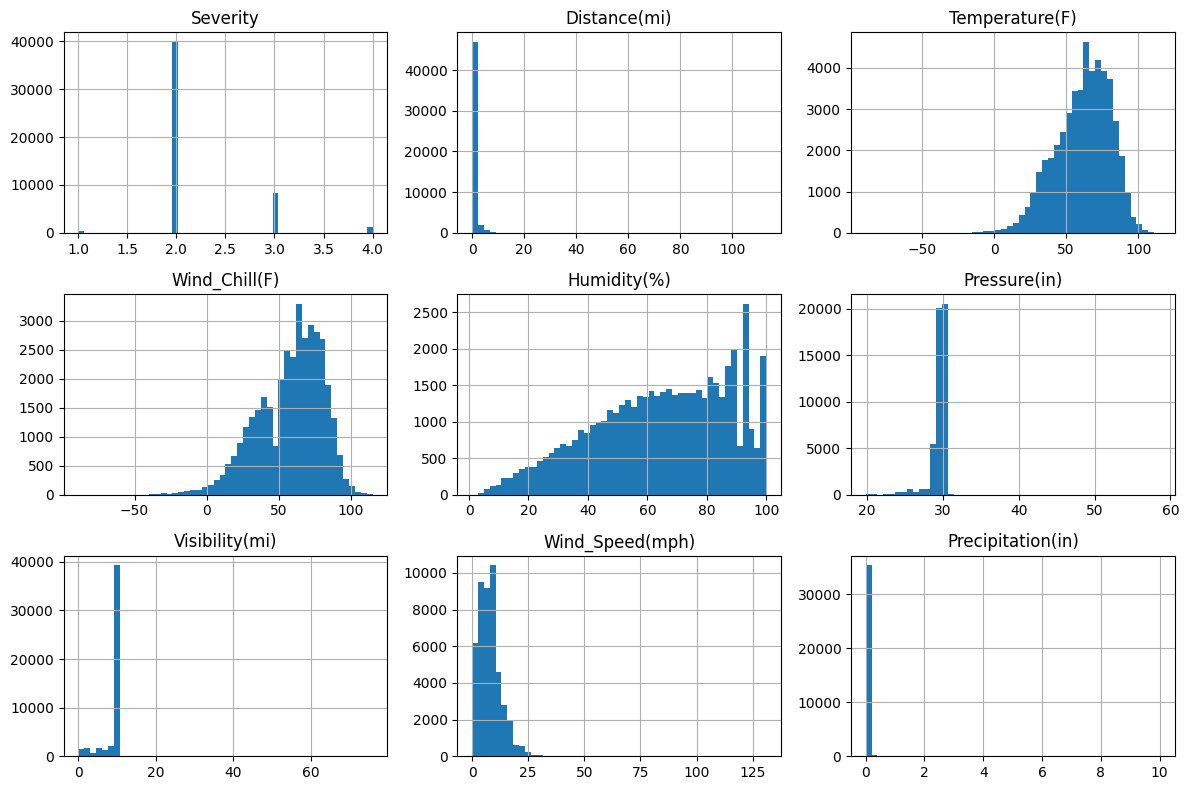

In [ ]:
numeric_columns = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

us_accidents[numeric_columns].hist(bins=50, figsize=(12, 8))
plt.tight_layout()

From this analysis, it can be observed that severity is mostly concentrated at a lower level, predominantly around level 2, indicating that the majority of accidents are relatively minor. Similarly, distance is clustered around shorter ranges, suggesting that accidents occur primarily in localized areas. In terms of temperature and wind chill, both show similar distributions, implying that accidents are more likely to occur under normal temperature conditions rather than in extreme cold or heat. However, humidity appears to increase with the number of accidents, suggesting that accidents are more frequent in high-humidity environments, such as during rain or fog, where visibility may be compromised. On the other hand, pressure, visibility, and wind speed show higher accident frequencies under normal values, while precipitation is generally low or non-existent in most cases. This indicates that precipitation might not be a significant factor in the majority of accidents.

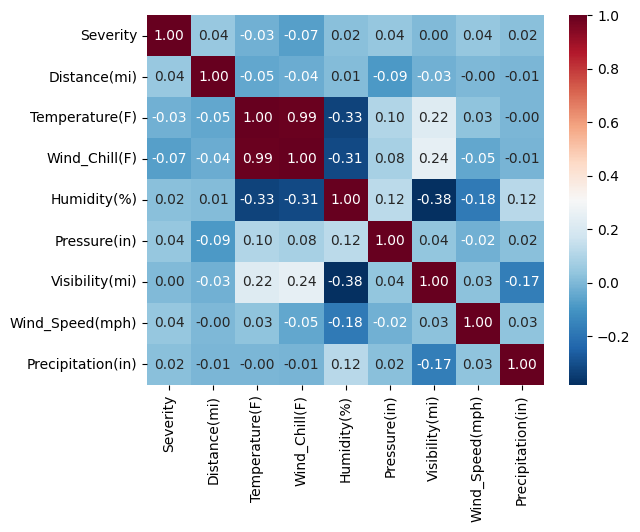

In [ ]:
corr_matrix = us_accidents[numeric_columns].corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');

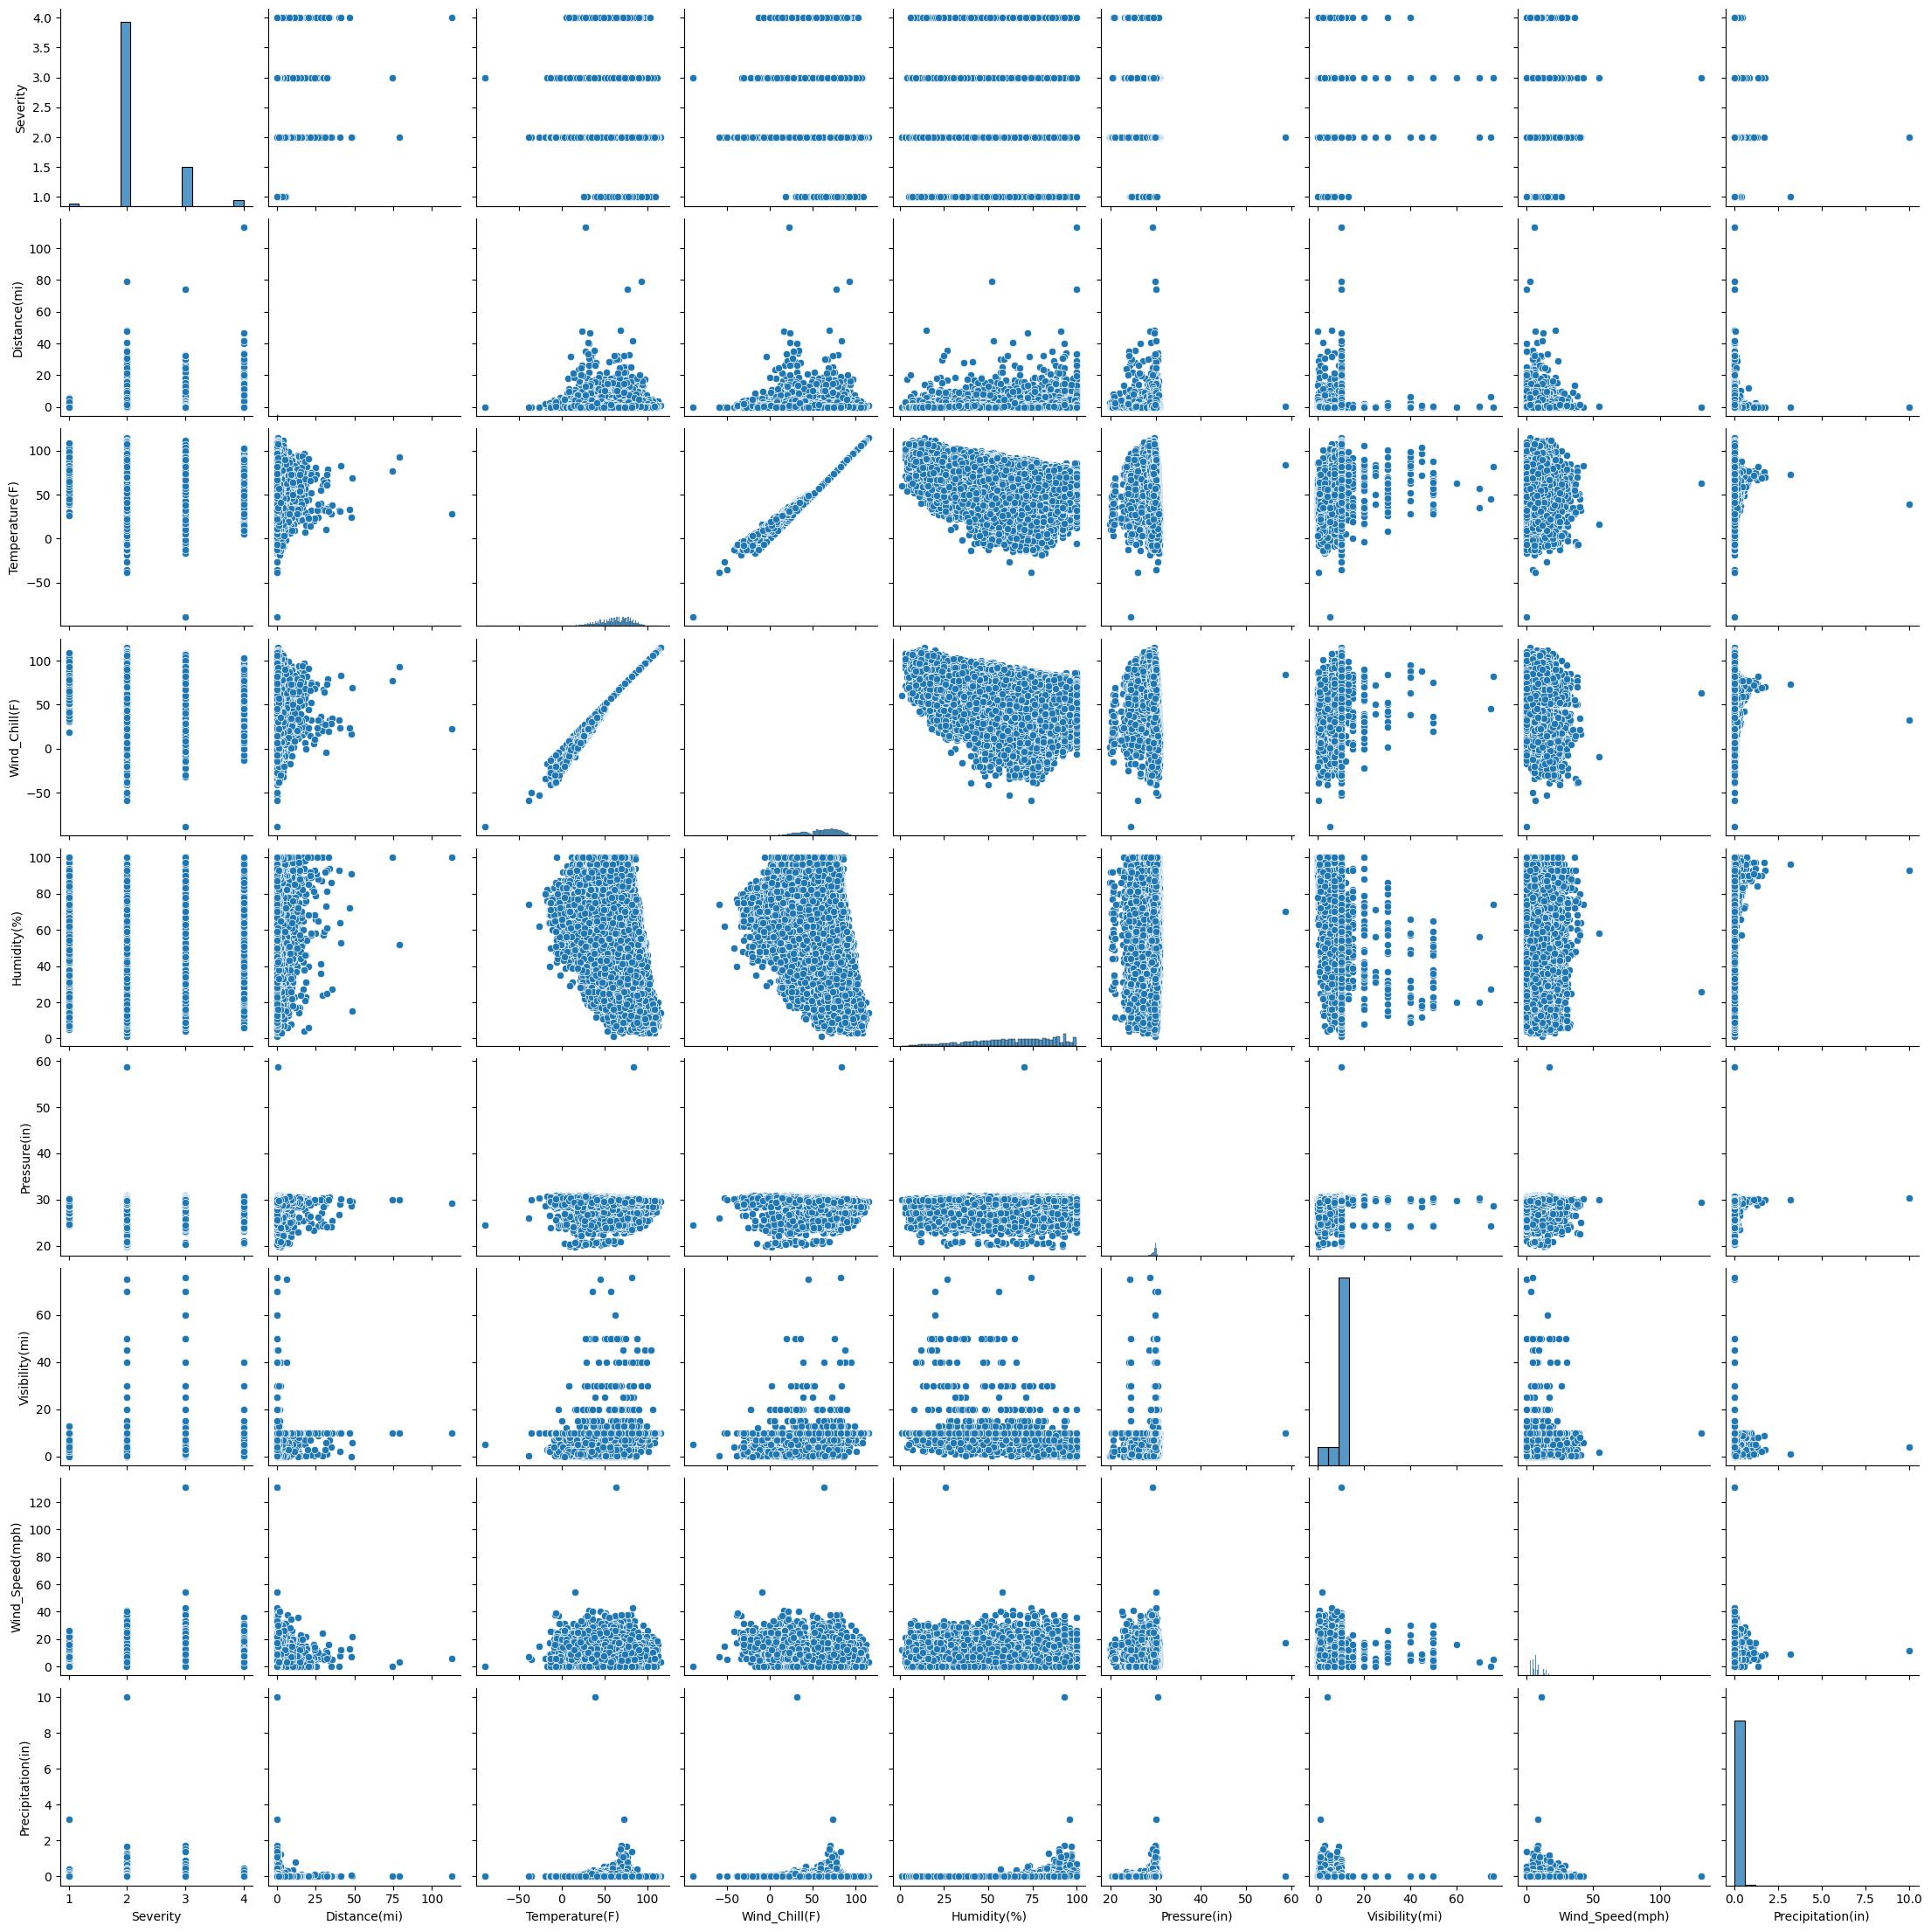

In [ ]:
sns.pairplot(us_accidents[numeric_columns])

When we analyzed the numerical values using a pairplot and correlation table, we observed that temperature and wind chill have a strong linear relationship, with a correlation of 0.99. Humidity shows a significant negative correlation with visibility (-0.38), which suggests that poor visibility is often associated with high humidity, such as in rain or fog. Additionally, precipitation has a weak negative correlation with visibility (-0.17), indicating that it slightly reduces visibility and may potentially contribute to accidents.


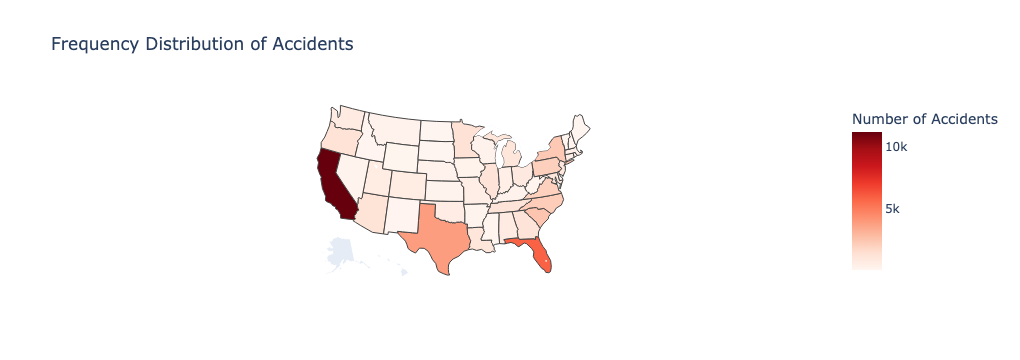

In [ ]:
state_accidents = us_accidents['State'].value_counts().reset_index()
state_accidents.columns = ['State', 'Accident_Count']

fig = px.choropleth(
    state_accidents,
    locations='State',
    locationmode='USA-states',
    color='Accident_Count',
    color_continuous_scale='Reds',
    scope='usa',
    title='Frequency Distribution of Accidents',
    labels = {'Accident_Count' : 'Number of Accidents'}
)

fig.show()

From the world map graph, it is evident that California has the highest number of car accidents compared to other states. Florida and Texas also report significantly high accident numbers. When analyzed by regions, East Coast states such as South Carolina, North Carolina, Virginia, and Pennsylvania also exhibit relatively high accident numbers. However, when seeing this graph, It is important to note that this data represents the absolute number of accidents, which may be influenced by the population size of these states. Since California, Florida, and Texas are highly populated, their accident numbers might appear disproportionately higher compared to other states.

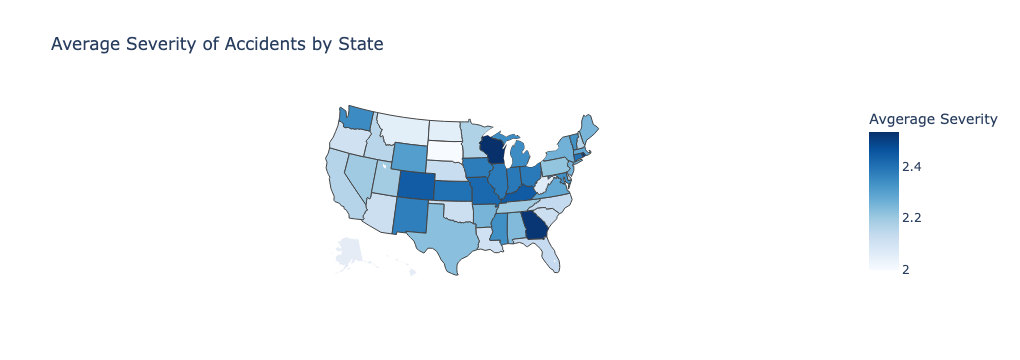

In [ ]:
state_severity = us_accidents.groupby('State')['Severity'].mean().reset_index()
state_severity.columns = ['State', 'Average_Severity']

fig = px.choropleth(
    state_severity,
    locations='State',
    locationmode='USA-states',
    color='Average_Severity',
    color_continuous_scale='Blues',
    scope='usa',
    title='Average Severity of Accidents by State',
    labels={'Average_Severity': 'Avgerage Severity'}
)

fig.show()

When analyzing accident severity by state, the average severity differs significantly from the total number of accidents. States like California, Texas, and Florida have the most accidents but low average severity rates. In contrast, states like Wisconsin, Georgia, and parts of the Midwest report the highest average severity rates. This may be linked to high-speed driving in less populated areas with less traffic congestion, which increases the likelihood of severe accidents.

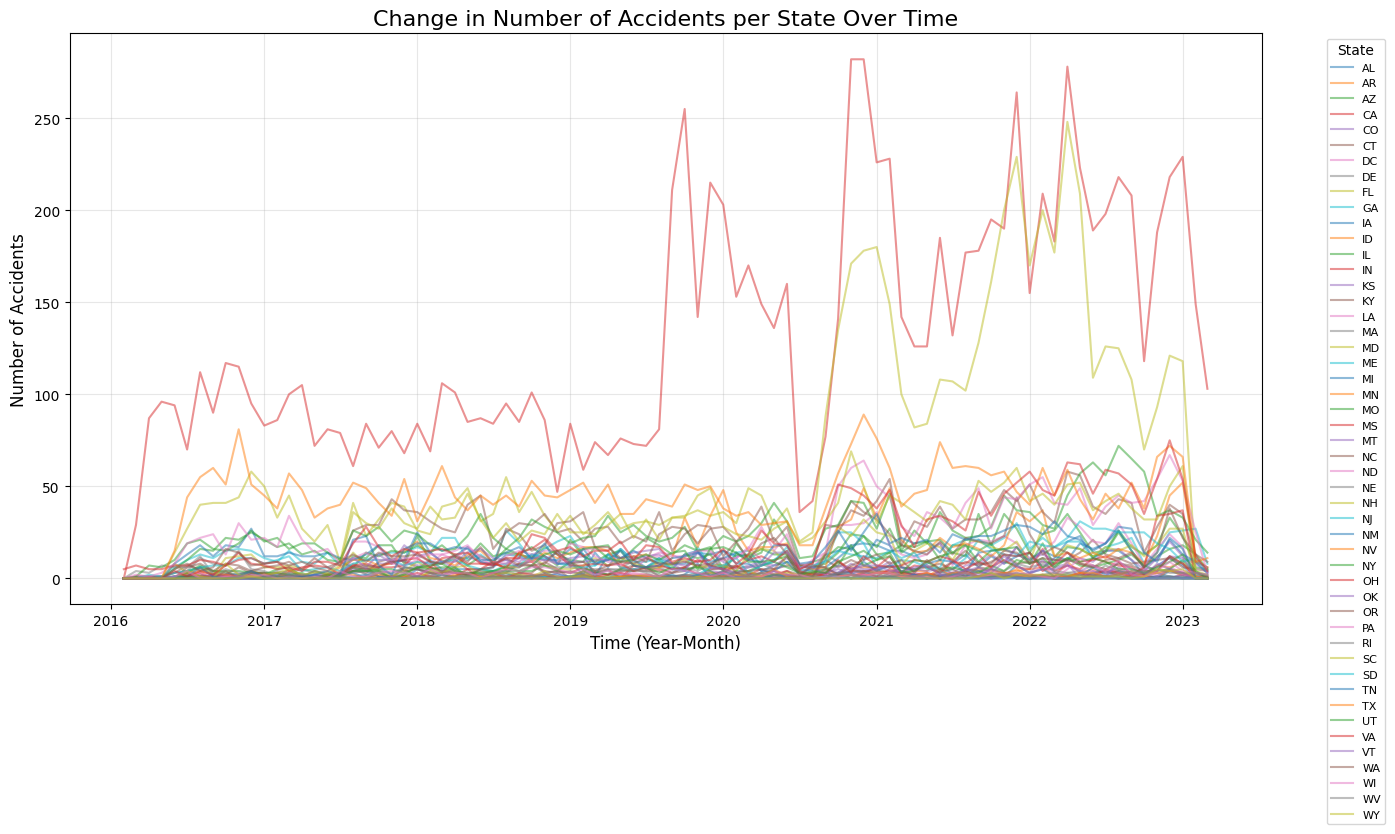

In [ ]:
us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'].str.split('.').str[0],errors='coerce')
us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

us_accidents['End_Time'] = pd.to_datetime(us_accidents['End_Time'].str.split('.').str[0],errors='coerce')
us_accidents['End_Time'] = pd.to_datetime(us_accidents['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

us_accidents['Year_Month'] = us_accidents['Start_Time'].dt.to_period('M')

accidents_trend = us_accidents.groupby(['State', 'Year_Month']).size().reset_index(name='Accident_Count')

accidents_trend_pivot = accidents_trend.pivot(index='Year_Month', columns='State', values='Accident_Count').fillna(0)

plt.figure(figsize=(14, 8))
for state in accidents_trend['State'].unique():
    plt.plot(accidents_trend_pivot.index.to_timestamp(), accidents_trend_pivot[state], label=state, alpha=0.5)

plt.title('Change in Number of Accidents per State Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title='State')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The line chart reveals a sharp rise in accidents across most states starting around June 2019, followed by a temporary decline in 2020. Afterward, accidents resumed their steep upward trend. Notably, Florida experienced substantial growth in accident numbers, particularly following California's sharp rebound. This surge placed Florida alongside California as the top two states with the highest accident numbers, both showing a distinct upward trend that sets them apart in accident frequency.

### 4.1 Data Cleaning

Before starting the machine learning process, we standardized column names, removed columns with uniform or excessive null values, and dropped specific rows with null values as part of the data cleaning process.

In [ ]:
#rename columns
us_accidents = us_accidents.rename(columns={'ID':'id','Source':'source','Severity':'severity','Start_Time':'start_time','End_Time':'end_time','Start_Lat':'start_lat','Start_Lng':'start_lng',
                             'End_Lat':'end_lat','End_Lng':'end_lng','Distance(mi)':'distance_mi','Description':'description','Street':'street','City':'city','County':'county','State':'state',
                             'Zipcode':'zipcode','Country':'country','Timezone':'timezone','Airport_Code':'airport_code','Weather_Timestamp':'weather_timestamp','Temperature(F)':'temperature_f',
                             'Wind_Chill(F)':'wind_chill_f','Humidity(%)':'humidity','Pressure(in)':'pressure_in','Visibility(mi)':'visibility_mi','Wind_Direction':'wind_direction','Wind_Speed(mph)':'wind_speed_mph',
                             'Precipitation(in)':'percipitation_in','Weather_Condition':'weather_condition','Amenity':'amenity','Bump':'bump','Crossing':'crossing','Give_Way':'give_way','Junction':'junction',
                             'No_Exit':'no_exit','Railway':'railway','Roundabout':'roundabout','Station':'station','Stop':'stop','Traffic_Calming':'traffic_calming','Traffic_Signal':'traffic_signal',
                             'Turning_Loop':'turning_loop','Sunrise_Sunset':'sunrise_sunset','Civil_Twilight':'civil_twilight','Nautical_Twilight':'nautical_twilight','Astronomical_Twilight':'astronomical_twilight'})

In [ ]:
#drop columns
us_accidents.drop(['id', 'source', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'description', 'county', 'airport_code','country', 'Year_Month'], axis=1, inplace=True)

In [ ]:
#check null values and drop rows
print(us_accidents.isnull().sum())
us_accidents.dropna(subset = ['street', 'city', 'zipcode', 'timezone'], axis = 0, inplace = True)

severity                     0
start_time                   0
end_time                     0
distance_mi                  0
street                      56
city                         2
state                        0
zipcode                     12
timezone                    42
weather_timestamp          802
temperature_f             1095
wind_chill_f             13015
humidity                  1169
pressure_in                925
visibility_mi             1148
wind_direction            1132
wind_speed_mph            3738
percipitation_in         14316
weather_condition         1115
amenity                      0
bump                         0
crossing                     0
give_way                     0
junction                     0
no_exit                      0
railway                      0
roundabout                   0
station                      0
stop                         0
traffic_calming              0
traffic_signal               0
turning_loop                 0
sunrise_

In [ ]:
#time zone - US/Eastern Unify (US/Central + 1, US/Mountain + 2, US/Pacific +3)

def convert_to_eastern(row):
    start_time = pd.to_datetime(row['start_time'])
    end_time = pd.to_datetime(row['end_time'])
    timezone = row['timezone']

    if timezone == 'US/Central':
        start_time += pd.Timedelta(hours=1)
        end_time += pd.Timedelta(hours=1)
    elif timezone == 'US/Mountain':
        start_time += pd.Timedelta(hours=2)
        end_time += pd.Timedelta(hours=2)
    elif timezone == 'US/Pacific':
        start_time += pd.Timedelta(hours=3)
        end_time += pd.Timedelta(hours=3)

    return pd.Series([start_time, end_time])

us_accidents[['start_time_eastern', 'end_time_eastern']] = us_accidents.apply(convert_to_eastern, axis=1)

In [ ]:
#convert fahrenheit to celsius

def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5/9
    return celsius

us_accidents['temperature_c'] = us_accidents['temperature_f'].apply(fahrenheit_to_celsius)
us_accidents['wind_chill_c'] = us_accidents['wind_chill_f'].apply(fahrenheit_to_celsius)

In [ ]:
#miles > kilometers / inch > centimeters

us_accidents['distance_km'] = us_accidents['distance_mi'] * 1.60934
us_accidents['visibility_km'] = us_accidents['visibility_mi'] * 1.60934

us_accidents['percipitation_cm'] = us_accidents['percipitation_in'] * 2.54
us_accidents['pressure_cm'] = us_accidents['pressure_in'] * 2.54

us_accidents['wind_speed_kph'] = us_accidents['wind_speed_mph'] * 1.60934

us_accidents.drop(['distance_mi', 'visibility_mi', 'percipitation_in', 'pressure_in', 'wind_speed_mph'], axis = 1, inplace = True)

### 4.2 Feature Engineering

Additionally, for categorical columns with many unique values, we manually mapped them to numerical values and created additional columns as needed.

In [ ]:
weather_mapping = {
    'Clear': 1, 'Partly Cloudy': 1, 'Mostly Clear': 1,
    'Rain': 2, 'Light Rain': 2, 'Heavy Rain': 3,
    'Snow': 3, 'Fog': 2, 'Thunderstorm': 3
}
us_accidents['weather_risk'] = us_accidents['weather_condition'].map(weather_mapping).fillna(0)

# Severe_Weather flag
us_accidents['severe_weather'] = us_accidents['weather_risk'].apply(lambda x: 1 if x >= 2 else 0)

# Weather Impact Index
us_accidents['weather_impact_index'] = us_accidents['wind_speed_kph'] * us_accidents['percipitation_cm'] / (us_accidents['temperature_c'] + 1)

In [ ]:
# Time-based features
us_accidents['hour'] = us_accidents['start_time'].dt.hour
us_accidents['month'] = us_accidents['start_time'].dt.month
us_accidents['day_of_week'] = us_accidents['start_time'].dt.dayofweek

#Rush Hour feature
us_accidents['rush_hour'] = us_accidents['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)

# Light Condition flag
us_accidents['light_condition'] = us_accidents['sunrise_sunset'].apply(lambda x: 1 if x == 'Day' else 0)

### 4.3 Train/Test Set Split

In [ ]:
X = us_accidents.drop(['severity'], axis=1)
y = us_accidents['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.4 Pipelines

The code defines a machine learning pipeline, `pre_pro_pipeline`, which integrates data preprocessing, feature selection, and oversampling. First, it uses a `ColumnTransformer` to preprocess numerical and categorical features separately: imputing missing values, scaling numerical data, and one-hot encoding categorical data. Next, it applies a `VarianceThreshold` step to remove low-variance features. A custom transformer, `SMOTEOnNumerical`, then applies BorderlineSMOTE to handle class imbalance by oversampling the numerical features. Finally, `RFE` (Recursive Feature Elimination) selects the top 20 features using logistic regression, optimizing the dataset for modeling.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import set_config
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.base import BaseEstimator, TransformerMixin

set_config(display='diagram')

datetime_columns = [col for col in X_train.columns if pd.api.types.is_datetime64_any_dtype(X_train[col])]
non_datetime_columns = [col for col in X_train.columns if col not in datetime_columns]

string_features = ['street', 'city', 'zipcode', 'county', 'timezone', 'airport_code', 'wind_direction', 'weather_condition']

numerical_features = [
    col for col in non_datetime_columns
    if X_train[col].nunique() > 50 and col not in string_features + ['id', 'weather_timestamp'] and not pd.api.types.is_period_dtype(X_train[col])
]

categorical_features = [
    col for col in non_datetime_columns
    if col not in numerical_features + ['id', 'weather_timestamp']
]

# Pipelines
numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)], remainder='drop')

# VarianceThreshold step
variance_threshold = VarianceThreshold(threshold=0.1)

# RFE feature selection
rfe = RFE(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_features_to_select=20  # Select only the top 20 features
)

# Custom transformer to handle SMOTE resampling only on numerical features
class SMOTEOnNumerical(BaseEstimator, TransformerMixin):
    def __init__(self, smote):
        self.smote = smote

    def fit(self, X, y=None):
        # No fitting required for this transformer
        return self

    def transform(self, X):
        return X  # Transformer is stateless; transformations happen during SMOTE step

    def fit_resample(self, X, y):
        numerical_cols = X.select_dtypes(include=np.number).columns
        X_resampled, y_resampled = self.smote.fit_resample(X[numerical_cols], y)
        # Concatenate resampled numerical data back with unmodified columns
        X_restored = pd.concat([X.reset_index(drop=True), X_resampled], axis=1)
        return X_restored, y_resampled

# Initialize SMOTE with custom logic
smote_transformer = SMOTEOnNumerical(smote=BorderlineSMOTE(random_state=42))

# Final pipeline
pre_pro_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing pipeline
    ('variance_threshold', variance_threshold),  # Remove low-variance features
    ('smote', smote_transformer),  # SMOTE resampling
    ('rfe', rfe)  # Recursive feature elimination
])
pre_pro_pipeline

/var/tmp/ipykernel_3277/2778398450.py:25: DeprecationWarning:

is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead

/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



KeyboardInterrupt: 

## **5. Machine Learning**

The code creates a machine learning pipeline, `final_pipeline`, combining the previously defined preprocessing steps (`pre_pro_pipeline`) with a logistic regression model (`classifier`). It then uses K-Fold cross-validation with 20 splits (`cv`) to evaluate the pipeline's performance on the training data, `X_train` and `y_train`. The `cross_val_score` function runs the pipeline on each fold, computes accuracy for each split, and returns the scores. Finally, it prints the individual cross-validation scores and their mean, providing a measure of the model's generalization performance. Since we are focusing on a classification, we decided to try and use Logistic Regression, Random Forest, KNN, SVM and Decision Trees and try and see which model will perform the best.

### 5.1 Select and Train Model

5.1.1 Logistic Regression

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import BorderlineSMOTE

logistic_regression= LogisticRegression(random_state=42, max_iter=1000)

# Build the final pipeline with the updated preprocessor
final_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', logistic_regression),

])

# Cross-validation using the final pipeline
cv = KFold(n_splits=20, shuffle=True, random_state=42)
final_scores = cross_val_score(final_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", final_scores)
print("Mean CV score:", final_scores.mean())

5.1.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Build the pipeline
rf_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', random_forest)
])

# Cross-validation
cv_rf = KFold(n_splits=20, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv_rf, scoring='accuracy')

print("Cross-validation scores (Random Forest):", rf_scores)
print("Mean CV score (Random Forest):", rf_scores.mean())

5.1.3 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Build the pipeline
knn_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', knn)
])

# Cross-validation
cv_knn = KFold(n_splits=20, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=cv_knn, scoring='accuracy')

print("Cross-validation scores (KNN):", knn_scores)
print("Mean CV score (KNN):", knn_scores.mean())

5.1.4 SVM

In [ ]:
from sklearn.svm import SVC

# Instantiate the Support Vector Classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', probability = True, random_state=42)

# Build the pipeline
svm_rbf_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', svm_rbf)
])

# Cross-validation
cv_svm_rbf = KFold(n_splits=10, shuffle=True, random_state=42)
svm_rbf_scores = cross_val_score(svm_rbf_pipeline, X_train, y_train, cv=cv_svm_rbf, scoring='accuracy')

print("Cross-validation scores (RBF SVM):", svm_rbf_scores)
print("Mean CV score (RBF SVM):", svm_rbf_scores.mean())


5.1.5 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Build the pipeline
dt_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', decision_tree)
])

# Cross-validation
cv_dt = KFold(n_splits=20, shuffle=True, random_state=42)
dt_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=cv_dt, scoring='accuracy')

print("Cross-validation scores (Decision Tree):", dt_scores)
print("Mean CV score (Decision Tree):", dt_scores.mean())

### 5.2 Fine-Tune

In [ ]:
from sklearn.experimental import enable_halving_search_cv

In [ ]:
pip install scikit-optimize

5.2.1 Random Search (Logistic Regression)

The chosen hyperparameters for logistic regression focus on optimizing regularization, convergence, and solver behavior. The regularization parameter C (spanning a wide range) controls the trade-off between fitting the training data and generalizing to unseen data. The penalty is fixed to l2 as it is commonly used for regularization in logistic regression. The solvers lbfgs and saga are efficient for large datasets and support l2 regularization. Finally, max_iter ensures the solver has enough iterations to converge, especially for complex datasets.

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
import numpy as np

# Define parameter grid for Logistic Regression
param_distributions_lr = {
    'classifier__C': np.logspace(-4, 4, 20),  # Regularization strength
    'classifier__penalty': ['l2'],           # Use 'l2' regularization
    'classifier__solver': ['lbfgs', 'saga'],  # Optimizers
    'classifier__max_iter': [200, 500]       # Maximum number of iterations
}

# HalvingRandomSearchCV
halving_random_search_lr = HalvingRandomSearchCV(
    estimator=final_pipeline,
    param_distributions=param_distributions_lr,
    factor=3,  # Reduction factor for halving
    scoring='accuracy',
    cv=3,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the Halving Random Search
halving_random_search_lr.fit(X_train, y_train)

# Output the results
print("Best parameters (Logistic Regression):", halving_random_search_lr.best_params_)
print("Best score (Logistic Regression):", halving_random_search_lr.best_score_)

5.2.1 Random Search (Random Forest)

The hyperparameters for the random forest model are chosen to tune both the structure of individual trees and the ensemble behavior. n_estimators controls the number of trees, balancing computation time and performance. max_depth prevents overfitting by limiting tree depth, while min_samples_split and min_samples_leaf manage tree branching and leaf size, ensuring balanced splits. bootstrap determines whether to use sampling with replacement, impacting model diversity and robustness.

In [ ]:
# Define parameter grid for Random Forest
param_distributions_rf = {
    'classifier__n_estimators': [50, 100, 200, 500],   # Number of trees
    'classifier__max_depth': [None, 10, 20, 30],       # Maximum depth
    'classifier__min_samples_split': [2, 5, 10],       # Minimum samples for split
    'classifier__min_samples_leaf': [1, 2, 4],         # Minimum samples per leaf
    'classifier__bootstrap': [True, False]             # Bootstrap sampling
}

# Halving Randomized Search
halving_random_search_rf = HalvingRandomSearchCV(
    rf_pipeline,
    param_distributions=param_distributions_rf,
    factor=3,  # Reduction factor for halving
    scoring='accuracy',
    cv=3,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores for parallel processing
)

# Fit the Halving Randomized Search
halving_random_search_rf.fit(X_train, y_train)

# Output the results
print("Best parameters (Halving Random Forest):", halving_random_search_rf.best_params_)
print("Best score (Halving Random Forest):", halving_random_search_rf.best_score_)

5.2.3 Random Search (KNN)

The KNN hyperparameters are selected to optimize distance-based classification. n_neighbors adjusts the number of nearby points considered for prediction, balancing bias and variance. The weights parameter decides whether all neighbors contribute equally or based on their distance. metric determines the distance calculation method, allowing the model to adapt to different types of data distributions and geometries.

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

# Define parameter grid for KNN
param_distributions_knn = {
    'classifier__n_neighbors': list(range(1, 30)),  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'], # Weight function
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Halving Randomized Search
halving_random_search_knn = HalvingRandomSearchCV(
    knn_pipeline,
    param_distributions=param_distributions_knn,
    factor=5,  # Reduction factor for halving
    scoring='accuracy',
    cv=3,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the Halving Randomized Search
halving_random_search_knn.fit(X_train, y_train)

# Output the results
print("Best parameters (Halving KNN):", halving_random_search_knn.best_params_)
print("Best score (Halving KNN):", halving_random_search_knn.best_score_)


5.2.4 Random Search (SVM and RBF Kernel)

The hyperparameters for the SVM with RBF kernel aim to fine-tune the model's complexity and decision boundaries. The regularization parameter C balances margin size and classification accuracy, while gamma affects the influence range of a single training example, controlling the smoothness of the decision boundary. Including both scale and auto for gamma simplifies tuning on varied datasets, while the logarithmic range for C and gamma ensures comprehensive exploration.

In [ ]:
param_distributions_svm_rbf = {
    'classifier__C': np.logspace(-3, 3, 10),  # Regularization parameter
    'classifier__gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 10))  # Kernel coefficient
}

# Halving Randomized Search
halving_random_search_svm_rbf = HalvingRandomSearchCV(
    svm_rbf_pipeline, param_distributions=param_distributions_svm_rbf,
    factor=3,  # Reduction factor for halving
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

halving_random_search_svm_rbf.fit(X_train, y_train)

# Output the results
print("Best parameters (Halving RBF SVM):", halving_random_search_svm_rbf.best_params_)
print("Best score (Halving RBF SVM):", halving_random_search_svm_rbf.best_score_)


### 5.3 Evalute Test Set

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is being used as an evaluation metric in the provided code. Here's how it is applied:

* Label Binarization:
Since the evaluation is for a multi-class problem, the LabelBinarizer transforms the ground truth labels (y_test) into a binary format suitable for calculating the ROC-AUC score in a one-vs-rest (OVR) manner.

* Probability Predictions:
The predict_proba method of the logistic regression model generates the predicted probabilities for each class. These probabilities are used instead of direct class predictions (y_pred) because ROC-AUC measures the ability of the model to rank predictions rather than their accuracy.

* ROC-AUC Calculation:
The roc_auc_score function computes the ROC-AUC score, using the binarized true labels (y_test_bin) and the predicted probabilities (y_pred_prob). The parameter average='macro' specifies that the metric is averaged across all classes equally, and multi_class='ovr' indicates a one-vs-rest approach for multi-class evaluation.

Using average='macro' ensures that the ROC-AUC score is calculated separately for each class in a multi-class setting and then averaged equally, giving each class an equal weight regardless of its prevalence. The multi_class='ovr' approach evaluates the model by treating each class as the positive class and all others as negative, enabling the calculation of separate ROC-AUC scores for each binary classification task. Together, these parameters provide a holistic view of the model's performance across all classes, ensuring that no class dominates the evaluation due to class imbalance or other factors.

5.3.1 Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Evaluate Logistic Regression Model
def evaluate_logistic_regression():
    best_model = halving_random_search_lr.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # F1 score
    f1 = f1_score(y_test, y_pred, average='macro')

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("Logistic Regression Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Macro Average): {f1:.4f}")
    print(f"ROC-AUC (Macro Average): {roc_auc:.4f}")

# Call the function
evaluate_logistic_regression()

5.3.2 Random Forest

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Evaluate Random Forest Model
def evaluate_random_forest():
    best_model = halving_random_search_rf.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # F1 score
    f1 = f1_score(y_test, y_pred, average='macro')

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("Random Forest Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Macro Average): {f1:.4f}")
    print(f"ROC-AUC (Macro Average): {roc_auc:.4f}")

# Call the function
evaluate_random_forest()


5.3.3 KNN

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Evaluate KNN Model
def evaluate_knn():
    best_model = halving_random_search_knn.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # F1 score
    f1 = f1_score(y_test, y_pred, average='macro')

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("KNN Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Macro Average): {f1:.4f}")
    print(f"ROC-AUC (Macro Average): {roc_auc:.4f}")

# Call the function
evaluate_knn()


5.3.4 SVM

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Evaluate SVM Model
def evaluate_svm():
    best_model = halving_random_search_svm_rbf.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # F1 score
    f1 = f1_score(y_test, y_pred, average='macro')

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("SVM Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Macro Average): {f1:.4f}")
    print(f"ROC-AUC (Macro Average): {roc_auc:.4f}")

# Call the function
evaluate_svm()

## **5. Conclusion**

### 5.1 Conclusion

Through the analysis, we revealed that while all models achieved similar accuracy (~0.79), the Random Forest model outperformed the others with the highest ROC-AUC (0.8093), making it the most suitable choice for this classification task. The results underscored the value of ensemble methods like Random Forest, which provide a strong balance between generalization and robustness. Leveraging ensemble models can be a strategic approach, particularly in scenarios with complex or noisy datasets, as they ensure consistent performance across diverse tasks.

During the fine-tuning process, we observed that increasing model complexity can sometimes lead to a decline in performance. This emphasized the importance of carefully optimizing hyperparameters, such as adjusting the search range and regularization parameters, to prevent overfitting and enhance model performance. When developing similar classification models or improving this model in the future, these lessons should guide efforts to achieve better accuracy scores. Additionally, we gained a deeper appreciation for selecting evaluation metrics that align with the task’s objectives. Specifically, in scenarios where high classification performance or precise class differentiation is critical, prioritizing metrics like ROC-AUC over simple accuracy is essential. We plan to apply this insight by aligning our evaluation metrics with the unique goals and contexts of future modeling efforts.

### 5.2 Challenges


The original dataset contained over 7 million rows and was approximately 3 GB in size, which caused our notebook to crash during the machine learning and fine-tuning phases. To resolve this, we performed stratified sampling to reduce the dataset to around 100,000 rows for the modeling phase and further down to 5,000 rows for fine-tuning, enabling us to execute the workflow without crashes. During the EDA process, working with time-series data revealed challenges with inconsistent time data formats. These differences caused issues within the pipeline, and to address this, we identified the various data types, converting incompatible formats where possible or excluding them from the machine learning process entirely. At the fine-tuning stage, we consistently received identical outputs across all methods (random search, grid search, Bayesian search). We hypothesized several potential causes for this: the small sample size of 5,000 rows may have caused each search method to exhaust all rows, producing the same result; the imbalanced dataset might have led to biased model performance; and the large number of categorical columns, when one-hot encoded, significantly increased the number of features, potentially negatively affecting model accuracy.


### 5.3 References

* Smote: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

* Data Imbalance: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

* Data Compression: https://dagster.io/glossary/data-compression

* Accident Rates in USA: https://injuryfacts.nsc.org/motor-vehicle/historical-fatality-trends/deaths-and-rates/#:~:text=The%20current%20rate%20is%2013.8,vehicles%2C%20a%2095%25%20improvement.

* Reason of Car Accidents: https://ezautospa.com/25141/13-updated-georgia-car-accident-statistics/#:~:text=Georgia%20is%20the%208th%20most,accidents%20as%20of%20February%202022.

### 5.4 Generative AI

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:
          
* Content Generation: We used ChatGPT to brainstorm ideas and structure the initial outline of the project. The AI helped us refine our thesis statement and suggested key points to include in each section.
* Research Assistance: ChatGPT was used to summarize research articles and generate concise overviews of relevant topics, helping us better understand and integrate complex concepts.
* Code Review and Debugging: GitHub Copilot and ChatGPT suggested ways to improve our Python code, including optimizing algorithms and resolving potential errors.
* Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
